In [ ]:
# cd to folder containing required files
cd ./required_files

In [2]:
import nibabel as nib
import nibabel.gifti
import nilearn
from nilearn import datasets, plotting
import sys
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as plt
from matplotlib.colors import ListedColormap
mpl.rcParams['svg.fonttype'] = 'none'
import sys
sys.path.append('gradient_data/src/')
from scipy.optimize import curve_fit
import scipy as scipy
from pyearth import Earth
from matplotlib import pyplot
import numpy
import sklearn
import seaborn as sns

/om/user/xaviergp/env/xavier_env/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


Forward Pass
----------------------------------------------------------------
iter  parent  var  knot   mse       terms  gcv    rsq    grsq   
----------------------------------------------------------------
0     -       -    -      0.019417  1      0.019  0.000  0.000  
1     0       0    14162  0.012924  3      0.013  0.334  0.334  
----------------------------------------------------------------
Stopping Condition 0: Reached maximum number of terms

Pruning Pass
--------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq   
--------------------------------------------
0     -   3      0.01  0.013  0.334  0.334  
1     1   2      0.01  0.013  0.324  0.324  
2     2   1      0.02  0.019  0.000  0.000  
--------------------------------------------
Selected iteration: 0

Earth Model
-------------------------------------
Basis Function  Pruned  Coefficient  
-------------------------------------
(Intercept)     No      1.29128      
h(x0+2.51814)   No      -0.

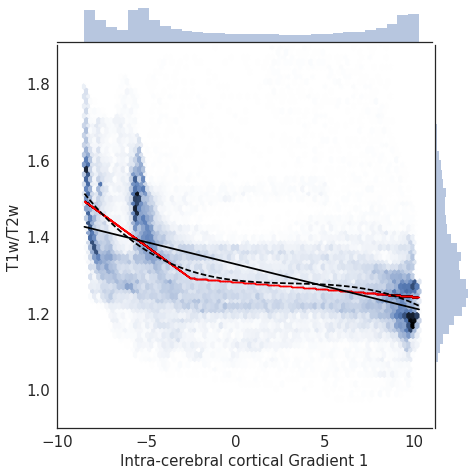

Linear equation:   
-0.01151 x + 1.328
Pearson r linear equation:  -0.523096 , r^2:  0.273629
Pearson p linear equation:  0.0
Spearman r linear equation:  -0.596093300558
Spearman p linear equation:  0.0
Cubic equation:
            3            2
-0.0001402 x + 0.001338 x - 0.005398 x + 1.286
r^2 for cubic equation:  0.332568087218
r^2 for spline:  0.334404938455


In [83]:
#CEREBRAL CORTICAL GRADIENT 1:

#load cerebral cortical average myelin map
MYELIN_cerebralcortex = nib.load('S1200.MyelinMap_BC_MSMAll.32k_fs_LR.dscalar.nii').get_data()

#load cerebral cortical functional gradients file
res2 = nib.load('result_bilateralcortex.dscalar.nii').get_data()
res2.shape = (8, 59412)
res2_component1 = res2[0]
res2_component2 = res2[1]
res2_component3 = res2[2]
res2_component4 = res2[3]

import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.5)

df = pd.DataFrame()
df['e0'] = np.array(res2_component1)
df['e1'] = MYELIN_cerebralcortex[0]
df['e2'] = np.array(res2_component2)
df['e3'] = np.array(res2_component4)

gradient = df['e0']
myelin = df['e1']

#plot myelin against functional gradient
fig = (sns.jointplot(gradient, myelin, kind='hex', size=7, ratio=10,
                   ylim = [0.9, 1.9],
                   xlim = [-10, 11], space=0.1, stat_func=None).set_axis_labels('Intra-cerebral cortical Gradient 1', 'T1w/T2w', fontsize=15))

#CALCULATE REGRESSIONS:
x= gradient
xp = np.linspace(np.min(x), np.max(x), x.count()) 
y= myelin
#generate a list of numbers from the minimum to the maximum value of our functional gradient:
z3 = np.polyfit(x, y, 3) #cubic regression
#construct the polynomial equation by taking the polyfit polynomial coefficients;
#so that p(1) gives the result of the equation when x is 1, etc.:
p3 = np.poly1d(z3) 
z1 = np.polyfit(x, y, 1) #linear regression
p1 = np.poly1d(z1)

#use py-earth to calculate splines:
Xearth = gradient
yearth = myelin
model = Earth(max_degree= None, max_terms=2)
model.fit(Xearth,yearth)
print(model.trace())
print(model.summary())
yearth_hat = model.predict(Xearth)

#generate regression lines on top of the jointplot
fig.ax_joint.plot(Xearth, yearth_hat, 'r.', xp, p3(xp), 'k--', xp, p1(xp), 'k-', markersize=2.1)

#save figure:
fig.savefig(os.path.abspath('./S1200_corr_cortex1.png'), format='png', dpi=600, transparent=False)
plt.show()

#calculate coefficients of determination for each regression:
pear_r = scipy.stats.pearsonr(myelin, gradient)
spear_r = scipy.stats.spearmanr(myelin, gradient)
print 'Linear equation: ', (np.poly1d(p1))
print 'Pearson r linear equation: ', pear_r[0], ', r^2: ', (pear_r[0]*pear_r[0])
print 'Pearson p linear equation: ', pear_r[1]
print 'Spearman r linear equation: ', spear_r[0]
print 'Spearman p linear equation: ', spear_r[1]
print 'Cubic equation:'
print (np.poly1d(p3))
print 'r^2 for cubic equation: ', sklearn.metrics.r2_score(y, p3(x))
print 'r^2 for spline: ', (model.score(Xearth, yearth))


Forward Pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     0.077467  1      0.077  0.000  0.000  
1     0       0    9487  0.075507  3      0.076  0.025  0.025  
---------------------------------------------------------------
Stopping Condition 0: Reached maximum number of terms

Pruning Pass
--------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq   
--------------------------------------------
0     -   3      0.08  0.076  0.025  0.025  
1     2   2      0.08  0.076  0.021  0.021  
2     1   1      0.08  0.077  0.000  0.000  
--------------------------------------------
Selected iteration: 0

Earth Model
-------------------------------------
Basis Function  Pruned  Coefficient  
-------------------------------------
(Intercept)     No      1.59975      
h(x0+1.40066)   No      0.0194605

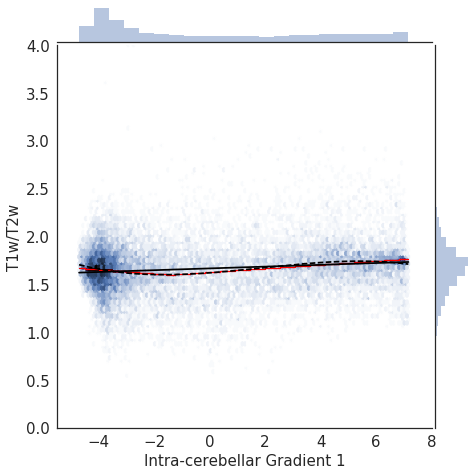

Linear equation:   
0.009349 x + 1.667
Pearson r linear equation:  0.12853 , r^2:  0.0165199
Pearson p linear equation:  1.24439962874e-66
Spearman r linear equation:  0.107804792681
Spearman p linear equation:  2.6777997135e-47
Cubic equation:
            3            2
-0.0008088 x + 0.004569 x + 0.02148 x + 1.621
r^2 for cubic equation:  0.0291813729652
r^2 for spline:  0.0253023189426


In [84]:
#SAME FOR CEREBELLUM GRADIENT 1:

MYELIN_cerebellum = nib.load('myelin_cerebellumonly_corrected.dscalar.nii').get_data()
res = nib.load('result_fromcerebellumtocerebellum.dscalar.nii').get_data()
res.shape = (8, 17853)
res_component1 = res[0]
res_component2 = res[1]
res_component3 = res[2]
res_component4 = res[3]

import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.5)

df = pd.DataFrame()
df['e0'] = np.array(res_component1)
df['e1'] = MYELIN_cerebellum[0]
df['e2'] = np.array(res_component2)
df['e3'] = np.array(res_component4)

gradient = df['e0']
myelin = df['e1']

fig = (sns.jointplot(gradient, myelin, kind='hex', size=7, ratio=10,
                   ylim = [0, 4],
                   xlim = [-5.5, 8], space=0.1, stat_func=None).set_axis_labels('Intra-cerebellar Gradient 1', 'T1w/T2w', fontsize=15))

x= gradient
xp = np.linspace(np.min(x), np.max(x), x.count()) 
y= myelin
z3 = np.polyfit(x, y, 3) 
p3 = np.poly1d(z3) 
z1 = np.polyfit(x, y, 1)
p1 = np.poly1d(z1)

Xearth = gradient
yearth = myelin
model = Earth(max_degree= None, max_terms=2)
model.fit(Xearth,yearth)
print(model.trace())
print(model.summary())
yearth_hat = model.predict(Xearth)

fig.ax_joint.plot(Xearth, yearth_hat, 'r.', xp, p3(xp), 'k--', xp, p1(xp), 'k-', markersize=2.1)
plt.show()
fig.savefig(os.path.abspath('./S1200_corr_crb1.png'), format='png', dpi=600, transparent=False)

pear_r = scipy.stats.pearsonr(myelin, gradient)
spear_r = scipy.stats.spearmanr(myelin, gradient)
print 'Linear equation: ', (np.poly1d(p1))
print 'Pearson r linear equation: ', pear_r[0], ', r^2: ', (pear_r[0]*pear_r[0])
print 'Pearson p linear equation: ', pear_r[1]
print 'Spearman r linear equation: ', spear_r[0]
print 'Spearman p linear equation: ', spear_r[1]
print 'Cubic equation:'
print (np.poly1d(p3))
print 'r^2 for cubic equation: ', sklearn.metrics.r2_score(y, p3(x))
print 'r^2 for spline: ', (model.score(Xearth, yearth))

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


Forward Pass
----------------------------------------------------------------
iter  parent  var  knot   mse       terms  gcv    rsq    grsq   
----------------------------------------------------------------
0     -       -    -      0.019417  1      0.019  0.000  0.000  
1     0       0    27040  0.011327  3      0.011  0.417  0.417  
----------------------------------------------------------------
Stopping Condition 0: Reached maximum number of terms

Pruning Pass
--------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq   
--------------------------------------------
0     -   3      0.01  0.011  0.417  0.417  
1     2   2      0.02  0.016  0.164  0.164  
2     1   1      0.02  0.019  0.000  0.000  
--------------------------------------------
Selected iteration: 0

Earth Model
-------------------------------------
Basis Function  Pruned  Coefficient  
-------------------------------------
(Intercept)     No      1.23014      
h(x0-1.29144)   No      0.1

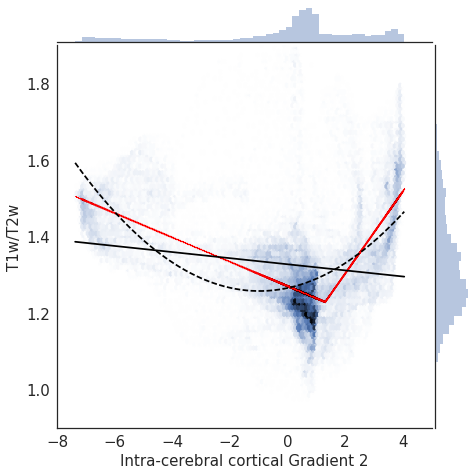

Linear equation:   
-0.007981 x + 1.328
Pearson r linear equation:  -0.158078 , r^2:  0.0249887
Pearson p linear equation:  0.0
Spearman r linear equation:  -0.0718473152487
Spearman p linear equation:  7.77586238698e-69
Quadratic equation:
          2
0.008197 x + 0.01604 x + 1.265
r^2 for quadratic equation:  0.310968352764
r^2 for spline:  0.416617795861


In [85]:
#SAME FOR CEREBRAL CORTICAL GRADIENT 2:

MYELIN_cerebralcortex = nib.load('S1200.MyelinMap_BC_MSMAll.32k_fs_LR.dscalar.nii').get_data()

res2 = nib.load('result_bilateralcortex.dscalar.nii').get_data()
res2.shape = (8, 59412)
res2_component1 = res2[0]
res2_component2 = res2[1]
res2_component3 = res2[2]
res2_component4 = res2[3]

import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.5)

df = pd.DataFrame()
df['e0'] = np.array(res2_component1)
df['e1'] = MYELIN_cerebralcortex[0]
df['e2'] = np.array(res2_component2)
df['e3'] = np.array(res2_component4)

gradient = df['e2']
myelin = df['e1']

fig = (sns.jointplot(gradient, myelin, kind='hex', size=7, ratio=10,
                   ylim = [0.9, 1.9],
                   xlim = [-8, 5], space=0.1, stat_func=None).set_axis_labels('Intra-cerebral cortical Gradient 2', 'T1w/T2w', fontsize=15))

x= gradient
xp = np.linspace(np.min(x), np.max(x), x.count()) 
y= myelin
z2 = np.polyfit(x, y, 2)
p2 = np.poly1d(z2)
z1 = np.polyfit(x, y, 1)
p1 = np.poly1d(z1)

Xearth = gradient
yearth = myelin
model = Earth(max_terms=2, max_degree=1) 
model.fit(Xearth,yearth)
print(model.trace())
print(model.summary())
yearth_hat = model.predict(Xearth)

fig.ax_joint.plot(Xearth, yearth_hat, 'r.', xp, p2(xp), 'k--', xp, p1(xp), 'k-', markersize=2.1)

plt.show()
fig.savefig(os.path.abspath('./S1200_corr_cortex2.png'), format='png', dpi=600, transparent=False)

pear_r = scipy.stats.pearsonr(myelin, gradient)
spear_r = scipy.stats.spearmanr(myelin, gradient)
print 'Linear equation: ', (np.poly1d(p1))
print 'Pearson r linear equation: ', pear_r[0], ', r^2: ', (pear_r[0]*pear_r[0])
print 'Pearson p linear equation: ', pear_r[1]
print 'Spearman r linear equation: ', spear_r[0]
print 'Spearman p linear equation: ', spear_r[1]
print 'Quadratic equation:'
print (np.poly1d(p2))
print 'r^2 for quadratic equation: ', sklearn.metrics.r2_score(y, p2(x))
print 'r^2 for spline: ', (model.score(Xearth, yearth))

Forward Pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     0.077467  1      0.077  0.000  0.000  
1     0       0    4959  0.076907  3      0.077  0.007  0.007  
---------------------------------------------------------------
Stopping Condition 0: Reached maximum number of terms

Pruning Pass
--------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq   
--------------------------------------------
0     -   3      0.08  0.077  0.007  0.007  
1     2   2      0.08  0.077  0.003  0.003  
2     1   1      0.08  0.077  0.000  0.000  
--------------------------------------------
Selected iteration: 0

Earth Model
-------------------------------------
Basis Function  Pruned  Coefficient  
-------------------------------------
(Intercept)     No      1.63438      
h(x0-1.47708)   No      0.390932 

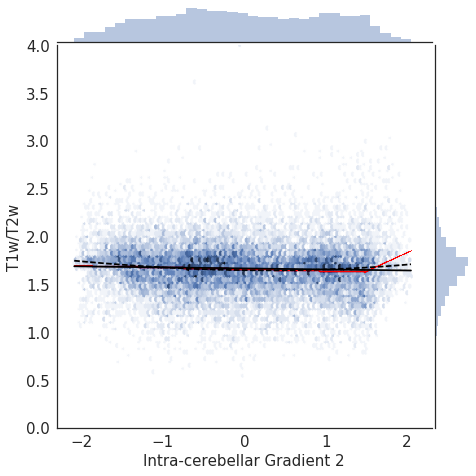

Linear equation:   
-0.01062 x + 1.667
Pearson r linear equation:  -0.0380694 , r^2:  0.00144928
Pearson p linear equation:  3.61593010958e-07
Spearman r linear equation:  -0.0612419242134
Spearman p linear equation:  2.61309207638e-16
Cubic equation:
           3           2
0.0008076 x + 0.01886 x - 0.01164 x + 1.648
r^2 for cubic equation:  0.00571405276723
r^2 for spline:  0.00722489286813


In [86]:
#SAME FOR CEREBELLUM GRADIENT 2:

MYELIN_cerebellum = nib.load('myelin_cerebellumonly_corrected.dscalar.nii').get_data()

res = nib.load('result_fromcerebellumtocerebellum.dscalar.nii').get_data()
res.shape = (8, 17853)
res_component1 = res[0]
res_component2 = res[1]
res_component3 = res[2]
res_component4 = res[3]


import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.5)

df = pd.DataFrame()
df['e0'] = np.array(res_component1)
df['e1'] = MYELIN_cerebellum[0]
df['e2'] = np.array(res_component2)
df['e3'] = np.array(res_component4)

gradient = df['e2']
myelin = df['e1']

fig = (sns.jointplot(gradient, myelin, kind='hex', size=7, ratio=10,
                   ylim = [0, 4],
                   xlim = [-2.3, 2.3], space=0.1, stat_func=None).set_axis_labels('Intra-cerebellar Gradient 2', 'T1w/T2w', fontsize=15))

x= gradient
xp = np.linspace(np.min(x), np.max(x), x.count()) 
y= myelin
z3 = np.polyfit(x, y, 3) 
p3 = np.poly1d(z3)  equation when x is 1
z1 = np.polyfit(x, y, 1)
p1 = np.poly1d(z1)

Xearth = gradient
yearth = myelin
model = Earth(max_terms=2, max_degree=1)
model.fit(Xearth,yearth)
print(model.trace())
print(model.summary())
yearth_hat = model.predict(Xearth)

fig.ax_joint.plot(Xearth, yearth_hat, 'r.', xp, p3(xp), 'k--', xp, p1(xp), 'k-', markersize=2.1)
plt.show()
fig.savefig(os.path.abspath('./S1200_corr_crb2.png'), format='png', dpi=600, transparent=False)

pear_r = scipy.stats.pearsonr(myelin, gradient)
spear_r = scipy.stats.spearmanr(myelin, gradient)
print 'Linear equation: ', (np.poly1d(p1))
print 'Pearson r linear equation: ', pear_r[0], ', r^2: ', (pear_r[0]*pear_r[0])
print 'Pearson p linear equation: ', pear_r[1]
print 'Spearman r linear equation: ', spear_r[0]
print 'Spearman p linear equation: ', spear_r[1]
print 'Cubic equation:'
print (np.poly1d(p3))
print 'r^2 for cubic equation: ', sklearn.metrics.r2_score(y, p3(x))
print 'r^2 for spline: ', (model.score(Xearth, yearth))

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


Forward Pass
----------------------------------------------------------------
iter  parent  var  knot   mse       terms  gcv    rsq    grsq   
----------------------------------------------------------------
0     -       -    -      0.019417  1      0.019  0.000  0.000  
1     0       0    22713  0.013652  3      0.014  0.297  0.297  
----------------------------------------------------------------
Stopping Condition 0: Reached maximum number of terms

Pruning Pass
--------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq   
--------------------------------------------
0     -   3      0.01  0.014  0.297  0.297  
1     1   2      0.02  0.017  0.101  0.101  
2     2   1      0.02  0.019  0.000  0.000  
--------------------------------------------
Selected iteration: 0

Earth Model
-------------------------------------
Basis Function  Pruned  Coefficient  
-------------------------------------
(Intercept)     No      1.41614      
h(x0-1.45406)   No      -0.

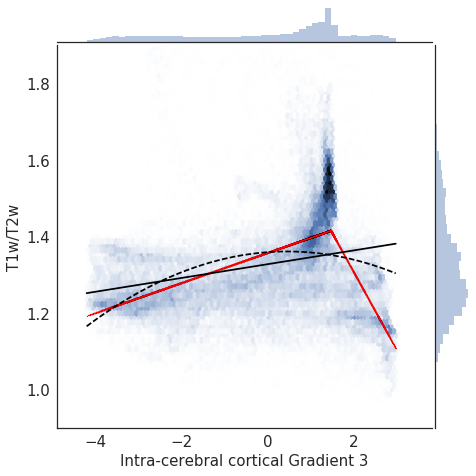

Linear equation:   
0.01801 x + 1.328
Pearson r linear equation:  0.241522 , r^2:  0.0583329
Pearson p linear equation:  0.0
Spearman r linear equation:  0.202070629458
Spearman p linear equation:  0.0
Quadratic equation:
           2
-0.009002 x + 0.008067 x + 1.359
r^2 for quadratic equation:  0.0996443946633
r^2 for spline:  0.296905980266


In [87]:
#SAME FOR CEREBRAL CORTICAL GRADIENT 3:

MYELIN_cerebralcortex = nib.load('S1200.MyelinMap_BC_MSMAll.32k_fs_LR.dscalar.nii').get_data()

res2 = nib.load('result_bilateralcortex.dscalar.nii').get_data()
res2.shape = (8, 59412)
res2_component1 = res2[0]
res2_component2 = res2[1]
res2_component3 = res2[2]
res2_component4 = res2[3]

import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.5)

df = pd.DataFrame()
df['e0'] = np.array(res2_component1)
df['e1'] = MYELIN_cerebralcortex[0]
df['e2'] = np.array(res2_component2)
df['e3'] = np.array(res2_component3)

gradient = df['e3']
myelin = df['e1']

fig = (sns.jointplot(gradient, myelin, kind='hex', size=7, ratio=10,
                   ylim = [0.9, 1.9],
                   xlim = [-4.9, 3.8], space=0.1, stat_func=None).set_axis_labels('Intra-cerebral cortical Gradient 3', 'T1w/T2w', fontsize=15))

x= gradient
xp = np.linspace(np.min(x), np.max(x), x.count()) 
y= myelin
z2 = np.polyfit(x, y, 2)
p2 = np.poly1d(z2)
z1 = np.polyfit(x, y, 1)
p1 = np.poly1d(z1)

Xearth = gradient
yearth = myelin
model = Earth(max_terms=2, max_degree=None) 
model.fit(Xearth,yearth)
print(model.trace())
print(model.summary())
yearth_hat = model.predict(Xearth)
fig.ax_joint.plot(Xearth, yearth_hat, 'r.', xp, p2(xp), 'k--', xp, p1(xp), 'k-', markersize=2.1)

plt.show()
fig.savefig(os.path.abspath('./S1200_corr_cortex3.png'), format='png', dpi=600, transparent=False)


pear_r = scipy.stats.pearsonr(myelin, gradient)
spear_r = scipy.stats.spearmanr(myelin, gradient)
print 'Linear equation: ', (np.poly1d(p1))
print 'Pearson r linear equation: ', pear_r[0], ', r^2: ', (pear_r[0]*pear_r[0])
print 'Pearson p linear equation: ', pear_r[1]
print 'Spearman r linear equation: ', spear_r[0]
print 'Spearman p linear equation: ', spear_r[1]
print 'Quadratic equation:'
print (np.poly1d(p2))
print 'r^2 for quadratic equation: ', sklearn.metrics.r2_score(y, p2(x))
print 'r^2 for spline: ', (model.score(Xearth, yearth))

Forward Pass
----------------------------------------------------------------
iter  parent  var  knot   mse       terms  gcv    rsq    grsq   
----------------------------------------------------------------
0     -       -    -      0.077467  1      0.077  0.000  0.000  
1     0       0    17111  0.075327  3      0.075  0.028  0.027  
----------------------------------------------------------------
Stopping Condition 0: Reached maximum number of terms

Pruning Pass
--------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq   
--------------------------------------------
0     -   3      0.08  0.075  0.028  0.027  
1     1   2      0.08  0.077  0.009  0.009  
2     2   1      0.08  0.077  0.000  0.000  
--------------------------------------------
Selected iteration: 0

Earth Model
--------------------------------------
Basis Function   Pruned  Coefficient  
--------------------------------------
(Intercept)      No      1.58972      
h(x0+0.235055)   No    

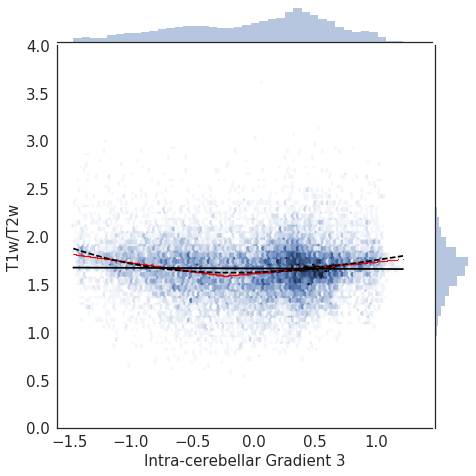

Linear equation:   
-0.005833 x + 1.667
Pearson r linear equation:  -0.0125276 , r^2:  0.000156941
Pearson p linear equation:  0.0941642676529
Spearman r linear equation:  -0.00356534401748
Spearman p linear equation:  0.633823608632
Cubic equation:
          3        2
-0.02335 x + 0.11 x + 0.04185 x + 1.626
r^2 for cubic equation:  0.0269425060466
r^2 for spline:  0.027621336687


In [5]:
#SAME FOR CEREBELLUM GRADIENT 3:

MYELIN_cerebellum = nib.load('myelin_cerebellumonly_corrected.dscalar.nii').get_data()

res = nib.load('result_fromcerebellumtocerebellum.dscalar.nii').get_data()
res.shape = (8, 17853)
res_component1 = res[0]
res_component2 = res[1]
res_component3 = res[2] * (-1) #multiply by -1 so that it matches direction of Guell et al., 2018
res_component4 = res[3]

import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.5)

df = pd.DataFrame()
df['e0'] = np.array(res_component1)
df['e1'] = MYELIN_cerebellum[0]
df['e2'] = np.array(res_component2)
df['e3'] = np.array(res_component3)

gradient = df['e3']
myelin = df['e1']

fig = (sns.jointplot(gradient, myelin, kind='hex', size=7, ratio=10,
                   ylim = [0, 4],
                   xlim = [-1.6, 1.45], space=0.1, stat_func=None).set_axis_labels('Intra-cerebellar Gradient 3', 'T1w/T2w', fontsize=15))

x= gradient
xp = np.linspace(np.min(x), np.max(x), x.count()) 
y= myelin
z3 = np.polyfit(x, y, 3) 
p3 = np.poly1d(z3) 
z1 = np.polyfit(x, y, 1)
p1 = np.poly1d(z1)

Xearth = gradient
yearth = myelin
model = Earth(max_terms=2, max_degree=1)
model.fit(Xearth,yearth)
print(model.trace())
print(model.summary())
yearth_hat = model.predict(Xearth)

fig.ax_joint.plot(Xearth, yearth_hat, 'r.', xp, p3(xp), 'k--', xp, p1(xp), 'k-', markersize=2.1)
plt.show()
fig.savefig(os.path.abspath('./S1200_corr_crb3.png'), format='png', dpi=600, transparent=False)


pear_r = scipy.stats.pearsonr(myelin, gradient)
spear_r = scipy.stats.spearmanr(myelin, gradient)
print 'Linear equation: ', (np.poly1d(p1))
print 'Pearson r linear equation: ', pear_r[0], ', r^2: ', (pear_r[0]*pear_r[0])
print 'Pearson p linear equation: ', pear_r[1]
print 'Spearman r linear equation: ', spear_r[0]
print 'Spearman p linear equation: ', spear_r[1]
print 'Cubic equation:'
print (np.poly1d(p3))
print 'r^2 for cubic equation: ', sklearn.metrics.r2_score(y, p3(x))
print 'r^2 for spline: ', (model.score(Xearth, yearth))

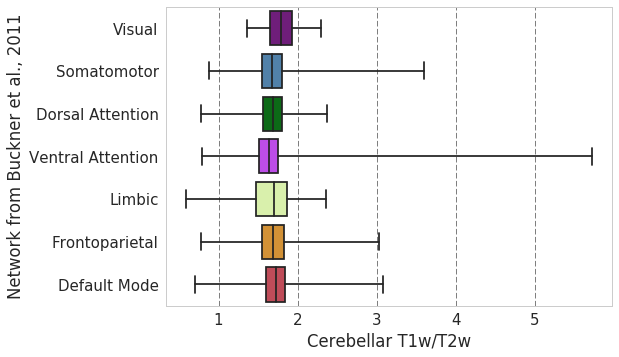

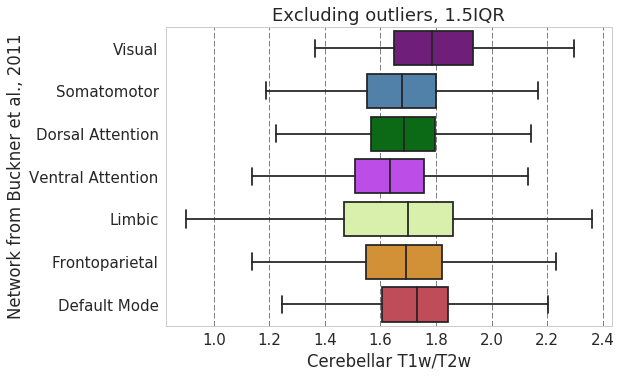

In [120]:
#GROUP CEREBELLUM T1w/T2w DATA ACCORDING TO RESTING STATE PARCELLATIONS FROM BUCKNER 2011:

#load buckner map and cerebellum T1w/T2w maps:
buckner = nib.load('buckner7networks.dscalar.nii').get_data()
buckner = buckner[0]
MYELIN_cerebellum = nib.load('myelin_cerebellumonly_corrected.dscalar.nii').get_data()
MYELIN_cerebellum = MYELIN_cerebellum[0]

#generate variables that correspond to each network in Buckner 2011:
MYELIN_cerebellum_visual = MYELIN_cerebellum[buckner == 1]
MYELIN_cerebellum_somatomotor = MYELIN_cerebellum[buckner == 2]
MYELIN_cerebellum_DAN = MYELIN_cerebellum[buckner == 3]
MYELIN_cerebellum_VAN = MYELIN_cerebellum[buckner == 4]
MYELIN_cerebellum_limbic = MYELIN_cerebellum[buckner == 5]
MYELIN_cerebellum_FP = MYELIN_cerebellum[buckner == 6]
MYELIN_cerebellum_DMN = MYELIN_cerebellum[buckner == 7]

#define colors for Buckner networks
datatoplot = [MYELIN_cerebellum_visual, MYELIN_cerebellum_somatomotor, MYELIN_cerebellum_DAN, MYELIN_cerebellum_VAN, MYELIN_cerebellum_limbic, MYELIN_cerebellum_FP, MYELIN_cerebellum_DMN]
cols7 = ((120,  18, 134),
         (70 ,130, 180),
         ( 0 ,118 , 14),
         (196 , 58 ,250),
         (220 ,248 ,164),
         (230, 148,  34),
         (205 , 62,  78 ))
cols = cols7
cols = np.asarray(cols, dtype=float)/255
labels=['Visual', 'Somatomotor', 'Dorsal Attention', 'Ventral Attention', 'Limbic', 'Frontoparietal', 'Default Mode']

#generate boxplot without excluding outliers:
ax = sns.boxplot(data=datatoplot, whis=999999999, orient='h', saturation=0.8)
sns.set_palette(cols)
sns.set_style('whitegrid')
ax.set_ylabel('Network from Buckner et al., 2011')
ax.set_xlabel('Cerebellar T1w/T2w')
ax.set_yticklabels(labels)
ax.grid(color='k', linestyle='--', linewidth=0.5, axis='x')
plt.show()

#generate boxplot excluding outliers (1.5 IQR):
ax = sns.boxplot(data=datatoplot, whis=1.5, orient='h', saturation=0.8, showfliers=False)
sns.set_palette(cols)
sns.set_style('whitegrid')
ax.set_ylabel('Network from Buckner et al., 2011')
ax.set_xlabel('Cerebellar T1w/T2w')
ax.set_title('Excluding outliers, 1.5IQR')
ax.set_yticklabels(labels)
ax.grid(color='k', linestyle='--', linewidth=0.5, axis='x')
plt.show()

ax.figure.savefig(os.path.abspath('./S1200_networks_crb.png'), format='png', dpi=600, bbox_inches='tight', transparent=False)


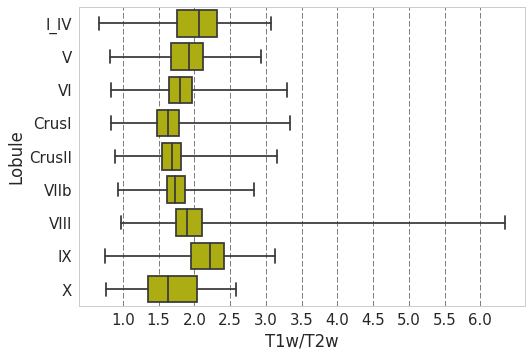

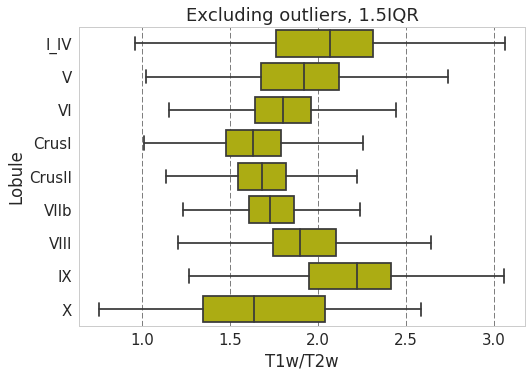

Looks like an anterior-posterior gradient, perhaps myelin variation in cerebellum has to do with signal quality! This is an enourmous confound, given that anterior-posterior in cerebellum means from motor to cognitive


In [121]:
# Visualize T1w/T2w values in each lobule before field inhomogeneity correction:

#load cerebellum atlas and cerebellum T1w/T2w before field inhomogeneity correction:
atlas = nib.load('CerebellumAtlas.dscalar.nii').get_data()
atlas = atlas[0]
MYELIN_cerebellum = nib.load('myelin_cerebellumonly.dscalar.nii').get_data()
MYELIN_cerebellum = MYELIN_cerebellum[0]

testing = MYELIN_cerebellum

#generate variables for each lobule in atlas
Left_I_IV = testing[atlas == 1]
Right_I_IV = testing[atlas == 2]
Left_V = testing[atlas == 3]
Right_V = testing[atlas == 4]
Left_VI = testing[atlas == 5]
Vermis_VI = testing[atlas == 6]
Right_VI = testing[atlas == 7]
Left_CrusI = testing[atlas == 8]
Vermis_CrusI = testing[atlas == 9]
Right_CrusI = testing[atlas == 10]
Left_CrusII = testing[atlas == 11]
Vermis_CrusII = testing[atlas == 12]
Right_CrusII = testing[atlas == 13]
Left_VIIb = testing[atlas == 14]
Vermis_VIIb = testing[atlas == 15]
Right_VIIb = testing[atlas == 16]
Left_VIIIa = testing[atlas == 17]
Vermis_VIIIa = testing[atlas == 18]
Right_VIIIa = testing[atlas == 19]
Left_VIIIb = testing[atlas == 20]
Vermis_VIIIb = testing[atlas == 21]
Right_VIIIb = testing[atlas == 22]
Left_IX = testing[atlas == 23]
Vermis_IX = testing[atlas == 24]
Right_IX = testing[atlas == 25]
Left_X = testing[atlas == 26]
Vermis_X = testing[atlas == 27]
Right_X = testing[atlas == 28]

#join left and right lobules:
I_IV = np.concatenate((Left_I_IV, Right_I_IV))
V = np.concatenate((Left_V, Right_V))
VI = np.concatenate((Left_VI, Vermis_VI, Right_VI))
CRUSI = np.concatenate((Left_CrusI, Vermis_CrusI, Right_CrusI))
CRUSII = np.concatenate((Left_CrusII, Vermis_CrusII, Right_CrusII))
VIIB = np.concatenate((Left_VIIb, Vermis_VIIb, Right_VIIb))
VIII = np.concatenate((Left_VIIIa, Vermis_VIIIa, Right_VIIIa, Left_VIIIb, Vermis_VIIIb, Right_VIIIb))
IX = np.concatenate((Left_IX, Right_IX, Vermis_IX))
X = np.concatenate((Left_X, Vermis_X, Right_X))

datatoplot = [I_IV, V, VI, CRUSI, CRUSII, VIIB, VIII, IX, X]

#generate boxplot without excluding outliers:
labels=['I_IV', 'V', 'VI', 'CrusI', 'CrusII', 'VIIb', 'VIII', 'IX', 'X']
ax = sns.boxplot(data=datatoplot, whis=999999999, orient='h', saturation=0.8, color='y')
sns.set_palette(cols)
sns.set_style('whitegrid')
ax.set_ylabel('Lobule')
ax.set_xlabel('T1w/T2w')
ax.set_yticklabels(labels)
ax.set_xticks([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6])
ax.grid(color='k', linestyle='--', linewidth=0.5, axis='x')
plt.show()

#generate boxplot excluding outliers (1.5 IQR):
ax = sns.boxplot(data=datatoplot, whis=1.5, orient='h', saturation=0.8, showfliers=False, color='y')
sns.set_palette(cols)
sns.set_style('whitegrid')
ax.set_ylabel('Lobule')
ax.set_xlabel('T1w/T2w')
ax.set_title('Excluding outliers, 1.5IQR')
ax.set_yticklabels(labels)
ax.grid(color='k', linestyle='--', linewidth=0.5, axis='x')
plt.show()
ax.figure.savefig(os.path.abspath('./S1200_lobules_beforeInhomogCorrection.png'), format='png', dpi=600, bbox_inches='tight', transparent=False)


print 'Looks like an anterior-posterior gradient, perhaps myelin variation in cerebellum has to do with signal quality! This is an enourmous confound, given that anterior-posterior in cerebellum means from motor to cognitive'

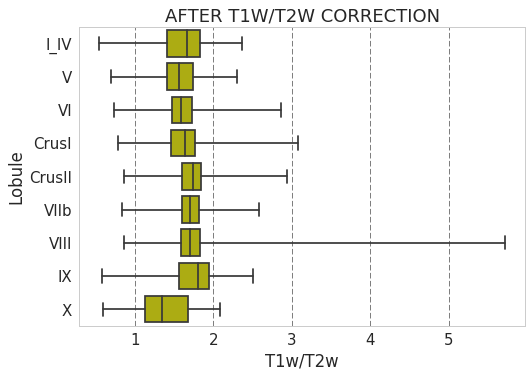

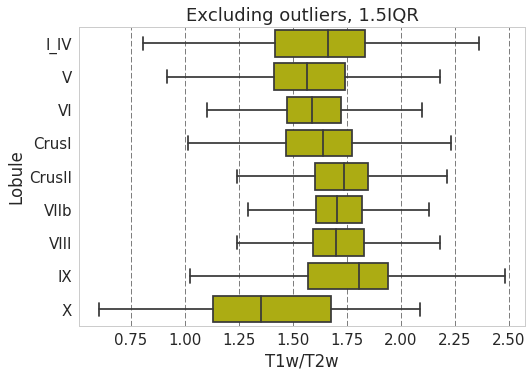

Anterior-posterior gradient goes away


In [122]:
# VISUALIZE T1w/T2w VALUES IN EACH LOBULE AFTER FIELD INHOMOGENEITY CORRECTION:

atlas = nib.load('CerebellumAtlas.dscalar.nii').get_data()
atlas = atlas[0]

MYELIN_cerebellum = nib.load('myelin_cerebellumonly_corrected.dscalar.nii').get_data()
MYELIN_cerebellum = MYELIN_cerebellum[0]


testing = MYELIN_cerebellum

Left_I_IV = testing[atlas == 1]
Right_I_IV = testing[atlas == 2]
Left_V = testing[atlas == 3]
Right_V = testing[atlas == 4]
Left_VI = testing[atlas == 5]
Vermis_VI = testing[atlas == 6]
Right_VI = testing[atlas == 7]
Left_CrusI = testing[atlas == 8]
Vermis_CrusI = testing[atlas == 9]
Right_CrusI = testing[atlas == 10]
Left_CrusII = testing[atlas == 11]
Vermis_CrusII = testing[atlas == 12]
Right_CrusII = testing[atlas == 13]
Left_VIIb = testing[atlas == 14]
Vermis_VIIb = testing[atlas == 15]
Right_VIIb = testing[atlas == 16]
Left_VIIIa = testing[atlas == 17]
Vermis_VIIIa = testing[atlas == 18]
Right_VIIIa = testing[atlas == 19]
Left_VIIIb = testing[atlas == 20]
Vermis_VIIIb = testing[atlas == 21]
Right_VIIIb = testing[atlas == 22]
Left_IX = testing[atlas == 23]
Vermis_IX = testing[atlas == 24]
Right_IX = testing[atlas == 25]
Left_X = testing[atlas == 26]
Vermis_X = testing[atlas == 27]
Right_X = testing[atlas == 28]

I_IV = np.concatenate((Left_I_IV, Right_I_IV))
V = np.concatenate((Left_V, Right_V))
VI = np.concatenate((Left_VI, Vermis_VI, Right_VI))
CRUSI = np.concatenate((Left_CrusI, Vermis_CrusI, Right_CrusI))
CRUSII = np.concatenate((Left_CrusII, Vermis_CrusII, Right_CrusII))
VIIB = np.concatenate((Left_VIIb, Vermis_VIIb, Right_VIIb))
VIII = np.concatenate((Left_VIIIa, Vermis_VIIIa, Right_VIIIa, Left_VIIIb, Vermis_VIIIb, Right_VIIIb))
IX = np.concatenate((Left_IX, Right_IX, Vermis_IX))
X = np.concatenate((Left_X, Vermis_X, Right_X))

datatoplot = [I_IV, V, VI, CRUSI, CRUSII, VIIB, VIII, IX, X]

labels=['I_IV', 'V', 'VI', 'CrusI', 'CrusII', 'VIIb', 'VIII', 'IX', 'X']
ax = sns.boxplot(data=datatoplot, whis=999999999, orient='h', saturation=0.8, color='y')
sns.set_palette(cols)
sns.set_style('whitegrid')
ax.set_ylabel('Lobule')
ax.set_xlabel('T1w/T2w')
ax.set_title('AFTER T1W/T2W CORRECTION')

ax.set_yticklabels(labels)
ax.grid(color='k', linestyle='--', linewidth=0.5, axis='x')
plt.show()

ax = sns.boxplot(data=datatoplot, whis=1.5, orient='h', saturation=0.8, showfliers=False, color='y')
sns.set_palette(cols)
sns.set_style('whitegrid')
ax.set_ylabel('Lobule')
ax.set_xlabel('T1w/T2w')
ax.set_title('Excluding outliers, 1.5IQR')
ax.set_yticklabels(labels)
ax.grid(color='k', linestyle='--', linewidth=0.5, axis='x')
plt.show()
ax.figure.savefig(os.path.abspath('./S1200_lobules_afterInhomogCorrection.png'), format='png', dpi=600, bbox_inches='tight', transparent=False)


print 'Anterior-posterior gradient goes away'

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


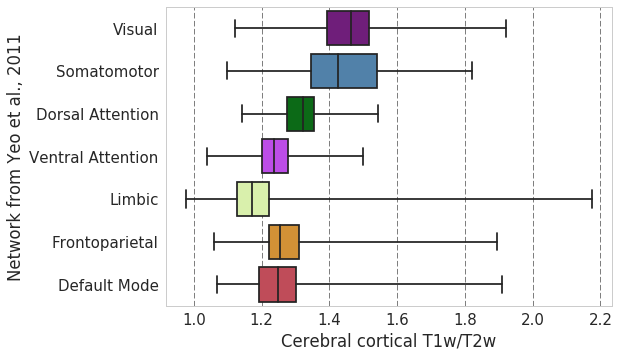

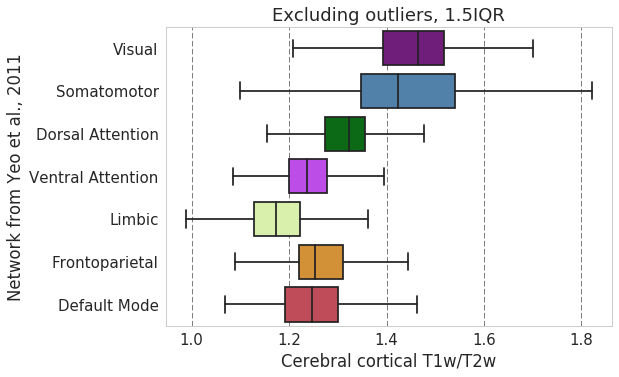

In [123]:
#group cerebral cortical T1w/T2w data according to resting state parcellations from Yeo 2011:

# Load Yeo 2011 resting-state maps:
DMNatlas = nib.load('DMN_minusmedialwall.dscalar.nii').get_data()
DMNatlas=DMNatlas[0]
dorsalattatlas = nib.load('dorsalatt_minusmedialwall.dscalar.nii').get_data()
dorsalattatlas=dorsalattatlas[0]
ventralattatlas = nib.load('ventralatt_minusmedialwall.dscalar.nii').get_data()
ventralattatlas=ventralattatlas[0]
frontoparietalatlas = nib.load('frontoparietal_minusmedialwall.dscalar.nii').get_data()
frontoparietalatlas=frontoparietalatlas[0]
limbicatlas = nib.load('limbic_minusmedialwall.dscalar.nii').get_data()
limbicatlas=limbicatlas[0]
visualatlas = nib.load('visual_minusmedialwall.dscalar.nii').get_data()
visualatlas=visualatlas[0]
somatomotoratlas = nib.load('somatomotor_minusmedialwall.dscalar.nii').get_data()
somatomotoratlas=somatomotoratlas[0]

#load cerebral cortical T1w/T2w map
MYELIN_cerebralcortex = nib.load('S1200.MyelinMap_BC_MSMAll.32k_fs_LR.dscalar.nii').get_data()
MYELIN_cerebralcortex = MYELIN_cerebralcortex[0]

gradient_cerebralcortex = nib.load('result_bilateralcortex.dscalar.nii').get_data()
gradient_cerebralcortex.shape = (8, 59412)
gradient1 = gradient_cerebralcortex[0]

testing = MYELIN_cerebralcortex

myelin_visual = testing[visualatlas == 1]
myelin_somatomotor = testing[somatomotoratlas == 1]
myelin_DAN = testing[dorsalattatlas == 1]
myelin_VAN = testing[ventralattatlas == 1]
myelin_limbic = testing[limbicatlas == 1]
myelin_FP = testing[frontoparietalatlas == 1]
myelin_DMN = testing[DMNatlas == 1]

#assign colors to each network:
datatoplot = [myelin_visual, myelin_somatomotor, myelin_DAN, myelin_VAN, myelin_limbic, myelin_FP, myelin_DMN]
cols7 = ((120,  18, 134),
         (70 ,130, 180),
         ( 0 ,118 , 14),
         (196 , 58 ,250),
         (220 ,248 ,164),
         (230, 148,  34),
         (205 , 62,  78 ))
cols = cols7
cols = np.asarray(cols, dtype=float)/255
labels=['Visual', 'Somatomotor', 'Dorsal Attention', 'Ventral Attention', 'Limbic', 'Frontoparietal', 'Default Mode']

#generate boxplot without excluding outliers:
ax = sns.boxplot(data=datatoplot, whis=999999999, orient='h', saturation=0.8)
sns.set_palette(cols)
sns.set_style('whitegrid')
ax.set_ylabel('Network from Yeo et al., 2011')
ax.set_xlabel('Cerebral cortical T1w/T2w')
ax.set_yticklabels(labels)
ax.grid(color='k', linestyle='--', linewidth=0.5, axis='x')
plt.show()

#generate boxplot excluding outliers (1.5 IQR):
ax = sns.boxplot(data=datatoplot, whis=1.5, orient='h', saturation=0.8, showfliers=False)
sns.set_palette(cols)
sns.set_style('whitegrid')
ax.set_ylabel('Network from Yeo et al., 2011')
ax.set_xlabel('Cerebral cortical T1w/T2w')
ax.set_title('Excluding outliers, 1.5IQR')
ax.set_yticklabels(labels)
#ax.set_xticks([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6])
ax.grid(color='k', linestyle='--', linewidth=0.5, axis='x')
plt.show()
ax.figure.savefig(os.path.abspath('./S1200_networks_cortex.png'), format='png', dpi=600, bbox_inches='tight', transparent=False)